--- 
title: Practice 6.1
author: Isabelle Antaran
format:
    html:
        toc: true
        code-fold: true
        embed-resources: true
theme: flatly
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
!pip install palmerpenguins

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *
from palmerpenguins import load_penguins
from pandas import get_dummies

In [ ]:
# Create dummy variables
penguin_data = load_penguins()
encoded_data = get_dummies(penguin_data)
cleaned_data = encoded_data.dropna()

cleaned_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


In [ ]:
#Create dummy variables 
from pandas import get_dummies
df = get_dummies(penguins)
df = df.dropna()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
# Model 1: Basic predictors with species and sex
# Predictors: bill_length_mm, species dummies, sex_female
target_var = cleaned_data["bill_depth_mm"]
features_set1 = cleaned_data[["bill_length_mm", "species_Chinstrap", "species_Gentoo", "sex_female"]]

# Split data into training and testing sets
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(
    features_set1, target_var, test_size=0.25, random_state=42)

# Fit linear regression model
model_1 = LinearRegression()
model_1.fit(X_train_m1, y_train_m1)

# Calculate predictions and errors
train_predictions_m1 = model_1.predict(X_train_m1)
test_predictions_m1 = model_1.predict(X_test_m1)

train_error_m1 = mean_squared_error(y_train_m1, train_predictions_m1)
test_error_m1 = mean_squared_error(y_test_m1, test_predictions_m1)

print(f"Model 1- Training Error: {train_error_m1:.4f}")
print(f"Model 1- Testing Error: {test_error_m1:.4f}")

Model 1- Training Error: 0.6658
Model 1- Testing Error: 0.7242


In [ ]:
# Model 2: Adding island information
# Predictors: Previous + island dummies

target_var2 = cleaned_data["bill_depth_mm"]
features_set2 = cleaned_data[[
    "bill_length_mm", "species_Chinstrap", "species_Gentoo", 
    "sex_female", "island_Biscoe", "island_Dream"
]]

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(
    features_set2, target_var2, test_size=0.25, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train_m2, y_train_m2)

train_predictions_m2 = model_2.predict(X_train_m2)
test_predictions_m2 = model_2.predict(X_test_m2)

train_error_m2 = mean_squared_error(y_train_m2, train_predictions_m2)
test_error_m2 = mean_squared_error(y_test_m2, test_predictions_m2)

print(f"Model 2 - Training Error: {train_error_m2:.4f}")
print(f"Model 2 - Testing Error: {test_error_m2:.4f}")

Model 2 - Training Error: 0.6646
Model 2 - Testing Error: 0.7226


In [ ]:
# Model 3- bill_length_mm + species dummies
target_var3 = cleaned_data["bill_depth_mm"]
features_set3 = cleaned_data[["bill_length_mm", "species_Chinstrap", "species_Gentoo"]]

X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(
    features_set3, target_var3, test_size=0.25, random_state=42
)

model_3 = LinearRegression()
model_3.fit(X_train_m3, y_train_m3)

train_predictions_m3 = model_3.predict(X_train_m3)
test_predictions_m3 = model_3.predict(X_test_m3)

train_error_m3 = mean_squared_error(y_train_m3, train_predictions_m3)
test_error_m3 = mean_squared_error(y_test_m3, test_predictions_m3)

print(f"Model 3 - Training Error: {train_error_m3:.4f}")
print(f"Model 3 - Testing Error: {test_error_m3:.4f}")


Model 3 - Training Error: 0.9105
Model 3 - Testing Error: 0.8650


In [ ]:
# Model 4: all available numeric and categorical variables
target_var4 = cleaned_data["bill_depth_mm"]
features_set4 = cleaned_data[[
    "bill_length_mm", "flipper_length_mm", "body_mass_g",
    "species_Chinstrap", "species_Gentoo", "sex_female",
    "island_Biscoe", "island_Dream"
]]

X_train_m4, X_test_m4, y_train_m4, y_test_m4 = train_test_split(
    features_set4, target_var4, test_size=0.25, random_state=42
)

model_4 = LinearRegression()
model_4.fit(X_train_m4, y_train_m4)

train_predictions_m4 = model_4.predict(X_train_m4)
test_predictions_m4 = model_4.predict(X_test_m4)

train_error_m4 = mean_squared_error(y_train_m4, train_predictions_m4)
test_error_m4 = mean_squared_error(y_test_m4, test_predictions_m4)

print(f"Model 4 - Training Error: {train_error_m4:.4f}")
print(f"Model 4 - Testing Error: {test_error_m4:.4f}")

Model 4 - Training Error: 0.6132
Model 4 - Testing Error: 0.6449


In [ ]:
# Compare Models
comparison_results = pd.DataFrame({
    "model_name": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "predictor_count": [4, 6, 3, 8],
    "test_mse": [test_error_m1, test_error_m2, test_error_m3, test_error_m4],
    "train_mse": [train_error_m1, train_error_m2, train_error_m3, train_error_m4]
})

print(f"Models Summary")
print(comparison_results)

Models Summary
  model_name  predictor_count  test_mse  train_mse
0    Model 1                4  0.724223   0.665786
1    Model 2                6  0.722583   0.664579
2    Model 3                3  0.864965   0.910486
3    Model 4                8  0.644876   0.613166


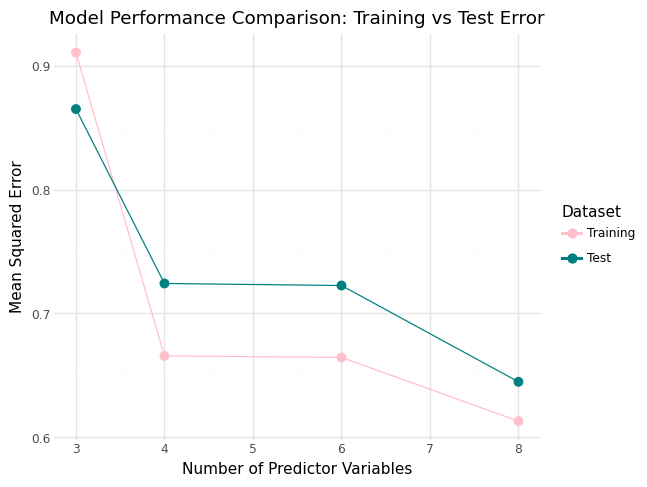

In [ ]:
#Visualization
(ggplot(comparison_results, aes(x="predictor_count"))
    + geom_point(aes(y='train_mse', color='"Training"'), size=3)
    + geom_point(aes(y='test_mse', color='"Test"'), size=3)
    + geom_line(aes(y='train_mse', color='"Training"'))
    + geom_line(aes(y='test_mse', color='"Test"'))
    + labs(title="Model Performance Comparison: Training vs Test Error",
           x="Number of Predictor Variables",
           y="Mean Squared Error")
    + scale_color_manual(name="Dataset", values={"Training": "pink", "Test": "teal"})
    + theme_minimal()
)

In [ ]:
best_model_idx = comparison_results['test_mse'].idxmin()
best_model_info = comparison_results.loc[best_model_idx]

print("BEST PERFORMING MODEL")
print(f"Model: {best_model_info['model_name']}")
print(f"Number of Predictors: {best_model_info['predictor_count']}")
print(f"Test MSE: {best_model_info['test_mse']:.4f}")

print("The best performing model is Model 4 with the lowest MSE.")

BEST PERFORMING MODEL
Model: Model 4
Number of Predictors: 8
Test MSE: 0.6449
The best performing model is Model 4 with the lowest MSE.
